## Step1-Data loading


In [44]:
import requests
import pandas as pd

#function to load dataset
def load_data_from_who(url):
    response=requests.get(url)
    data=response.json()
    return pd.DataFrame(data['value'])

#loading the dataset
adult_obesity_df = load_data_from_who('https://ghoapi.azureedge.net/api/NCD_BMI_30C')
child_obesity_df = load_data_from_who('https://ghoapi.azureedge.net/api/NCD_BMI_PLUS2C')
adult_malnutrition_df = load_data_from_who('https://ghoapi.azureedge.net/api/NCD_BMI_18C')
child_malnutrition_df = load_data_from_who('https://ghoapi.azureedge.net/api/NCD_BMI_MINUS2C')

#adding age category to DFs
adult_obesity_df['age_group']="Adult"
child_obesity_df['age_group']="Children"
adult_malnutrition_df['age_group']="Adult"
child_malnutrition_df['age_group']="Children"


In [45]:
#appending the dataframe
df_obesity=pd.concat([adult_obesity_df,child_obesity_df],ignore_index=True)
df_malnutrition=pd.concat([adult_malnutrition_df,child_malnutrition_df],ignore_index=True)

In [46]:
df_obesity.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,Dim1,TimeDim,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,age_group
0,5470983,NCD_BMI_30C,COUNTRY,IRL,EUR,YEAR,Europe,SEX,SEX_BTSX,1993,...,15.0 [12.9-17.0],14.950801,12.935686,17.049487,None,2024-02-29T16:06:41.017+01:00,1993,1993-01-01T00:00:00+01:00,1993-12-31T00:00:00+01:00,Adult
1,5471151,NCD_BMI_30C,COUNTRY,NOR,EUR,YEAR,Europe,SEX,SEX_FMLE,2017,...,17.5 [14.3-21.0],17.492768,14.273898,20.972565,None,2024-02-29T16:06:41.017+01:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00,Adult
2,262,NCD_BMI_30C,COUNTRY,KHM,WPR,YEAR,Western Pacific,SEX,SEX_BTSX,2001,...,1.0 [0.8-1.3],0.981696,0.756741,1.274868,None,2024-02-29T16:06:41.017+01:00,2001,2001-01-01T00:00:00+01:00,2001-12-31T00:00:00+01:00,Adult
3,359,NCD_BMI_30C,COUNTRY,IRN,EMR,YEAR,Eastern Mediterranean,SEX,SEX_MLE,2020,...,17.5 [15.8-19.2],17.487641,15.793777,19.245727,None,2024-02-29T16:06:41.017+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00,Adult
4,832,NCD_BMI_30C,COUNTRY,TJK,EUR,YEAR,Europe,SEX,SEX_FMLE,1995,...,7.9 [5.8-10.4],7.904842,5.783271,10.387149,None,2024-02-29T16:06:41.017+01:00,1995,1995-01-01T00:00:00+01:00,1995-12-31T00:00:00+01:00,Adult


In [47]:
df_malnutrition.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,Dim1,TimeDim,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,age_group
0,5470934,NCD_BMI_18C,COUNTRY,ETH,YEAR,AFR,Africa,SEX,SEX_BTSX,2006,...,26.8 [24.2-29.4],26.780900,24.166416,29.392958,None,2024-02-29T16:06:41.017+01:00,2006,2006-01-01T00:00:00+01:00,2006-12-31T00:00:00+01:00,Adult
1,5471589,NCD_BMI_18C,COUNTRY,CHN,YEAR,WPR,Western Pacific,SEX,SEX_BTSX,1997,...,8.9 [8.2-9.5],8.866591,8.245191,9.503709,None,2024-02-29T16:06:41.017+01:00,1997,1997-01-01T00:00:00+01:00,1997-12-31T00:00:00+01:00,Adult
2,53,NCD_BMI_18C,COUNTRY,GAB,YEAR,AFR,Africa,SEX,SEX_FMLE,2021,...,5.8 [4.0-8.1],5.795110,3.972036,8.077021,None,2024-02-29T16:06:41.017+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00,Adult
3,416,NCD_BMI_18C,COUNTRY,TUV,YEAR,WPR,Western Pacific,SEX,SEX_BTSX,2001,...,0.9 [0.4-1.9],0.936569,0.365154,1.859289,None,2024-02-29T16:06:41.017+01:00,2001,2001-01-01T00:00:00+01:00,2001-12-31T00:00:00+01:00,Adult
4,1677,NCD_BMI_18C,COUNTRY,GHA,YEAR,AFR,Africa,SEX,SEX_MLE,2002,...,13.2 [10.0-16.7],13.204283,10.048541,16.712034,None,2024-02-29T16:06:41.017+01:00,2002,2002-01-01T00:00:00+01:00,2002-12-31T00:00:00+01:00,Adult


In [48]:
df_malnutrition.shape

(83160, 26)

In [49]:
df_obesity.shape

(83160, 26)

In [50]:
#filtering the year 2012 - 2022
df_obesity=df_obesity[(df_obesity['TimeDim']>=2012)&(df_obesity['TimeDim']<=2022)]
df_malnutrition=df_malnutrition[(df_malnutrition['TimeDim']>=2012)&(df_malnutrition['TimeDim']<=2022)]

In [51]:
df_obesity.shape

(27720, 26)

In [52]:
df_malnutrition.shape

(27720, 26)

In [53]:
df_obesity.columns

Index(['Id', 'IndicatorCode', 'SpatialDimType', 'SpatialDim',
       'ParentLocationCode', 'TimeDimType', 'ParentLocation', 'Dim1Type',
       'Dim1', 'TimeDim', 'Dim2Type', 'Dim2', 'Dim3Type', 'Dim3',
       'DataSourceDimType', 'DataSourceDim', 'Value', 'NumericValue', 'Low',
       'High', 'Comments', 'Date', 'TimeDimensionValue', 'TimeDimensionBegin',
       'TimeDimensionEnd', 'age_group'],
      dtype='object')

## Step 2 - Data cleaning

In [54]:
#Just keep the required columns
Cols_to_keep=['ParentLocation','Dim1','TimeDim','Low','High','NumericValue','SpatialDim','age_group']

df_obesity=df_obesity[Cols_to_keep].copy()
df_malnutrition=df_malnutrition[Cols_to_keep].copy()

#Rename the columns
rename_col={
    'TimeDim':'Year',
    'Dim1':'Gender',
    'NumericValue':'Mean_Estimate',
    'Low':'LowerBound',
    'High':'UpperBound',
    'ParentLocation':'Region',
    'SpatialDim':'Country'
}

df_obesity.rename(columns=rename_col,inplace=True)
df_malnutrition.rename(columns=rename_col,inplace=True)

In [55]:
df_obesity.columns

Index(['Region', 'Gender', 'Year', 'LowerBound', 'UpperBound', 'Mean_Estimate',
       'Country', 'age_group'],
      dtype='object')

In [56]:
df_obesity['Gender'].unique()

array(['SEX_FMLE', 'SEX_MLE', 'SEX_BTSX'], dtype=object)

In [57]:
#Changing the Values in gender
gender_map={
    'SEX_MLE':'Male',
    'SEX_FMLE':'Female',
    'SEX_BTSX':'Both'
}

df_obesity['Gender']=df_obesity['Gender'].replace(gender_map)
df_malnutrition['Gender']=df_malnutrition['Gender'].replace(gender_map)

In [58]:
df_obesity['Gender'].unique()

array(['Female', 'Male', 'Both'], dtype=object)

In [59]:
df_obesity['Country'].unique()

array(['NOR', 'IRN', 'IRQ', 'GRL', 'ARM', 'MLT', 'PAN', 'IND', 'MDG',
       'GIN', 'PHL', 'YEM', 'JOR', 'BWA', 'NZL', 'MUS', 'BLR', 'BEL',
       'UGA', 'MKD', 'ASM', 'GAB', 'GNQ', 'SEN', 'BGR', 'PAK', 'TUV',
       'ISR', 'NAM', 'UZB', 'DZA', 'GEO', 'KAZ', 'BDI', 'PYF', 'BOL',
       'HUN', 'COG', 'PRY', 'CHE', 'IRL', 'BRA', 'SWZ', 'LKA', 'LBR',
       'WPR', 'VEN', 'WSM', 'BLZ', 'WB_HI', 'KGZ', 'LSO', 'PNG', 'AUS',
       'TKL', 'PER', 'RWA', 'MYS', 'SLV', 'MNE', 'KOR', 'URY', 'CAN',
       'EGY', 'TUR', 'BTN', 'MWI', 'PRK', 'THA', 'BRN', 'KWT', 'QAT',
       'WB_LMI', 'FSM', 'NIU', 'TON', 'PRT', 'CHN', 'HRV', 'LVA', 'BRB',
       'CYP', 'UKR', 'GTM', 'CIV', 'ZAF', 'AGO', 'LUX', 'LCA', 'DNK',
       'NGA', 'SEAR', 'SRB', 'MOZ', 'HTI', 'CUB', 'TUN', 'MAR', 'VCT',
       'SUR', 'NER', 'CRI', 'BHS', 'DEU', 'COK', 'FIN', 'JAM', 'SSD',
       'ZWE', 'SWE', 'KIR', 'TTO', 'OMN', 'ETH', 'GHA', 'SDN', 'LBY',
       'DMA', 'BGD', 'TCD', 'ARG', 'COM', 'PLW', 'GRD', 'SLB', 'ERI',
       'SVK', 

In [60]:
#Converting Country code to Full name
import pycountry

def country_name(Code):
    try:
        return pycountry.countries.get(alpha_3=Code).name
    except:
        return special_cases.get(Code,Code)
    
special_cases = {
                    'GLOBAL': 'Global',
                    'WB_LMI': 'Low & Middle Income',
                    'WB_HI': 'High Income',
                    'WB_LI': 'Low Income',
                    'EMR': 'Eastern Mediterranean Region',
                    'EUR': 'Europe',
                    'AFR': 'Africa',
                    'SEAR': 'South-East Asia Region',
                    'WPR': 'Western Pacific Region',
                    'AMR': 'Americas Region',
                    'WB_UMI': 'Upper Middle Income'}

df_obesity['Country']=df_obesity['Country'].apply(country_name)
df_malnutrition['Country']=df_malnutrition['Country'].apply(country_name)


In [61]:
df_obesity['Country'].head()

1                        Norway
3     Iran, Islamic Republic of
10                         Iraq
16                    Greenland
18                      Armenia
Name: Country, dtype: object

In [62]:
df_obesity['Mean_Estimate']

1        17.492768
3        17.487641
10       28.335530
16       27.948704
18       31.893221
           ...    
83137     1.475931
83140     1.966190
83148    16.634887
83151     2.032189
83154    11.390631
Name: Mean_Estimate, Length: 27720, dtype: float64

In [63]:
# adding custom columns

#age_group column
df_obesity['age_group'] = df_obesity['age_group'].replace({'Children': 'Child/Adolescent'})
df_malnutrition['age_group'] = df_malnutrition['age_group'].replace({'Children': 'Child/Adolescent'})

#CI_Width column
df_obesity['CI_Width']=df_obesity['UpperBound']-df_obesity['LowerBound']
df_malnutrition['CI_Width']=df_malnutrition['UpperBound']-df_malnutrition['LowerBound']

#obesity_level column
def obesity_level(value):
    if value >=30:
        return "High"
    elif value >=25:
        return "Moderate"
    else:
        return "Low"
    
df_obesity['obesity_level']=df_obesity['Mean_Estimate'].apply(obesity_level)

#malnutrition_level column
def mal_level(value):
    if value >=20:
        return "High"
    elif value >=10:
        return "Moderate"
    else:
        return "Low"
    
df_malnutrition['malnutrition_level']=df_malnutrition['Mean_Estimate'].apply(mal_level)

In [64]:
df_malnutrition.columns

Index(['Region', 'Gender', 'Year', 'LowerBound', 'UpperBound', 'Mean_Estimate',
       'Country', 'age_group', 'CI_Width', 'malnutrition_level'],
      dtype='object')

In [65]:
df_obesity.columns

Index(['Region', 'Gender', 'Year', 'LowerBound', 'UpperBound', 'Mean_Estimate',
       'Country', 'age_group', 'CI_Width', 'obesity_level'],
      dtype='object')

## Step - 3 EDA

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

##### 1. Shape and structure of the data

Obesity Dataset shape: (27720, 10)
Malnutrition Dataset shape:  (27720, 10)

Obesity Dataset Datatypes:
 Region            object
Gender            object
Year               int64
LowerBound       float64
UpperBound       float64
Mean_Estimate    float64
Country           object
age_group         object
CI_Width         float64
obesity_level     object
dtype: object

Malnutrition Dataset Datatypes:
 Region                 object
Gender                 object
Year                    int64
LowerBound            float64
UpperBound            float64
Mean_Estimate         float64
Country                object
age_group              object
CI_Width              float64
malnutrition_level     object
dtype: object


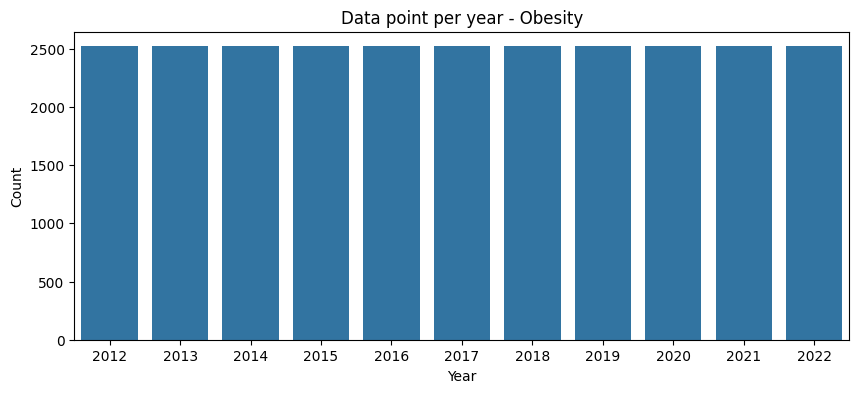

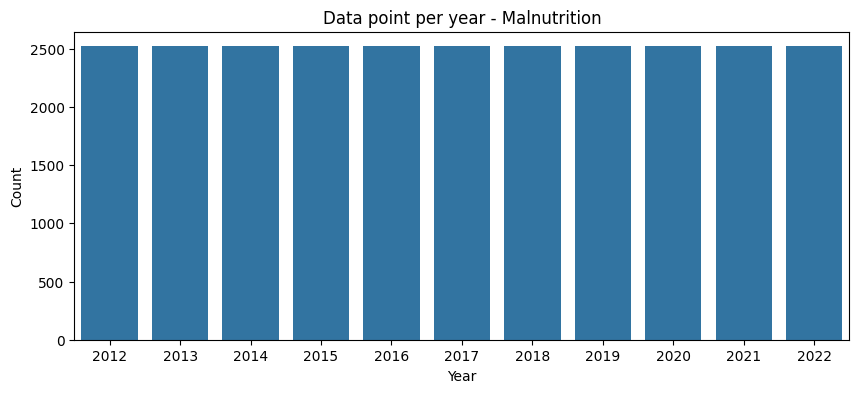

In [67]:
# Shape of the dataframe
print("Obesity Dataset shape:", df_obesity.shape)
print("Malnutrition Dataset shape: ",df_malnutrition.shape)

# Structure of the dataframe
print("\nObesity Dataset Datatypes:\n",df_obesity.dtypes)
print("\nMalnutrition Dataset Datatypes:\n",df_malnutrition.dtypes)

#Counts of the data per year
plt.figure(figsize=(10,4))
sns.countplot(df_obesity,x='Year')
plt.title("Data point per year - Obesity")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10,4))
sns.countplot(df_malnutrition,x='Year')
plt.title("Data point per year - Malnutrition")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

##### 2. Missing Values and Unusual Values

Missing values in the Obesity data:
 Region           1452
Gender              0
Year                0
LowerBound          0
UpperBound          0
Mean_Estimate       0
Country             0
age_group           0
CI_Width            0
obesity_level       0
dtype: int64


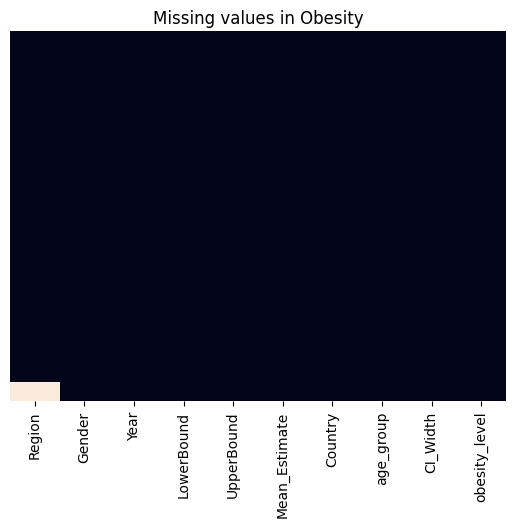


Missing values in the Malnutrition Data:
 Region                1452
Gender                   0
Year                     0
LowerBound               0
UpperBound               0
Mean_Estimate            0
Country                  0
age_group                0
CI_Width                 0
malnutrition_level       0
dtype: int64


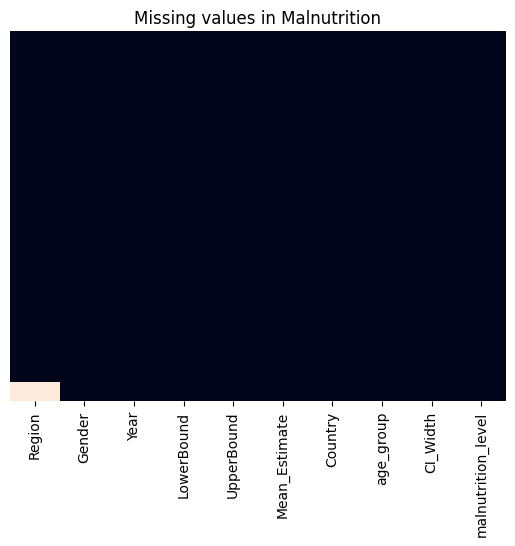

In [68]:
print("Missing values in the Obesity data:\n",df_obesity.isnull().sum())

sns.heatmap(df_obesity.sort_values(by='Region').isnull(),cbar=False,yticklabels=False)
plt.title("Missing values in Obesity")
plt.show()

print("\nMissing values in the Malnutrition Data:\n",df_malnutrition.isnull().sum())

sns.heatmap(df_malnutrition.sort_values(by='Region').isnull(),cbar=False,yticklabels=False)
plt.title("Missing values in Malnutrition")
plt.show()


##### 3. Distribution of Mean_Estimate and CI_Width

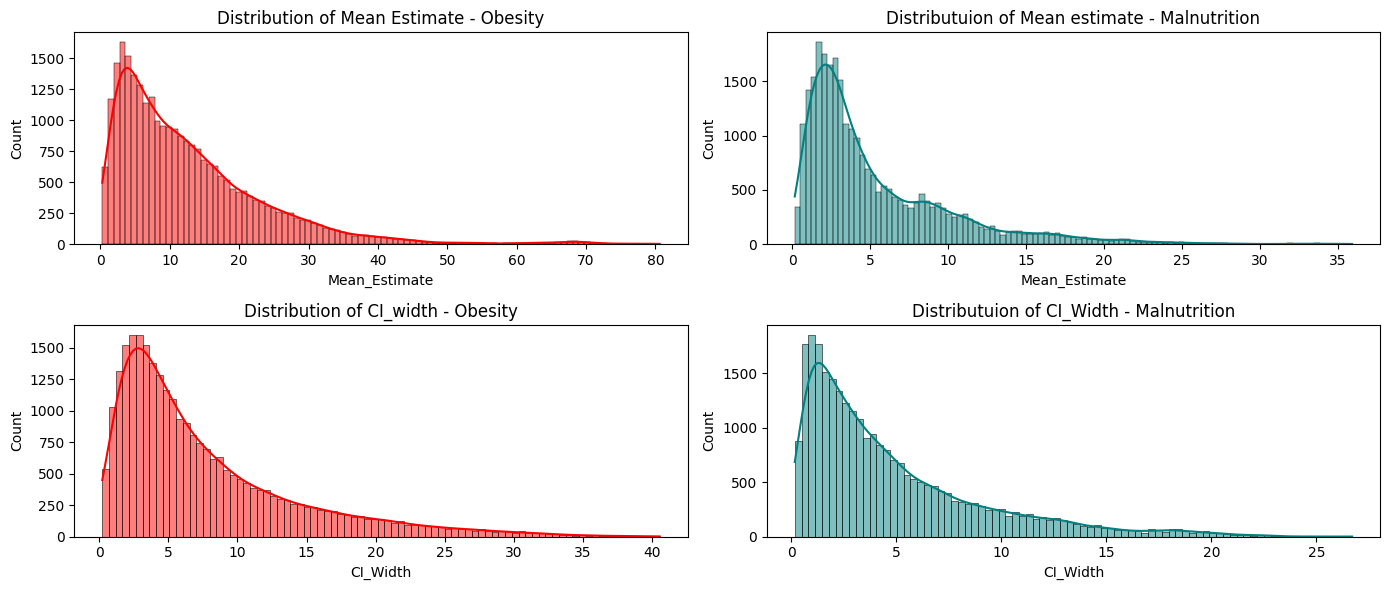

In [69]:
plt.figure(figsize=(14,6))

# Mean estimate - Obesity
plt.subplot(2,2,1)
sns.histplot(df_obesity['Mean_Estimate'],kde=True,color='red')
plt.title("Distribution of Mean Estimate - Obesity")

#Mean estimate - Malnutrition
plt.subplot(2,2,2)
sns.histplot(df_malnutrition['Mean_Estimate'],kde=True,color="teal")
plt.title("Distributuion of Mean estimate - Malnutrition")

#CI width - obesity
plt.subplot(2,2,3)
sns.histplot(df_obesity['CI_Width'],kde=True,color="red")
plt.title("Distribution of CI_width - Obesity")

#Ci width - Malnutrition
plt.subplot(2,2,4)
sns.histplot(df_malnutrition['CI_Width'],kde=True,color="teal")
plt.title("Distributuion of CI_Width - Malnutrition")

plt.tight_layout()
plt.show()

##### 4. Trends over time

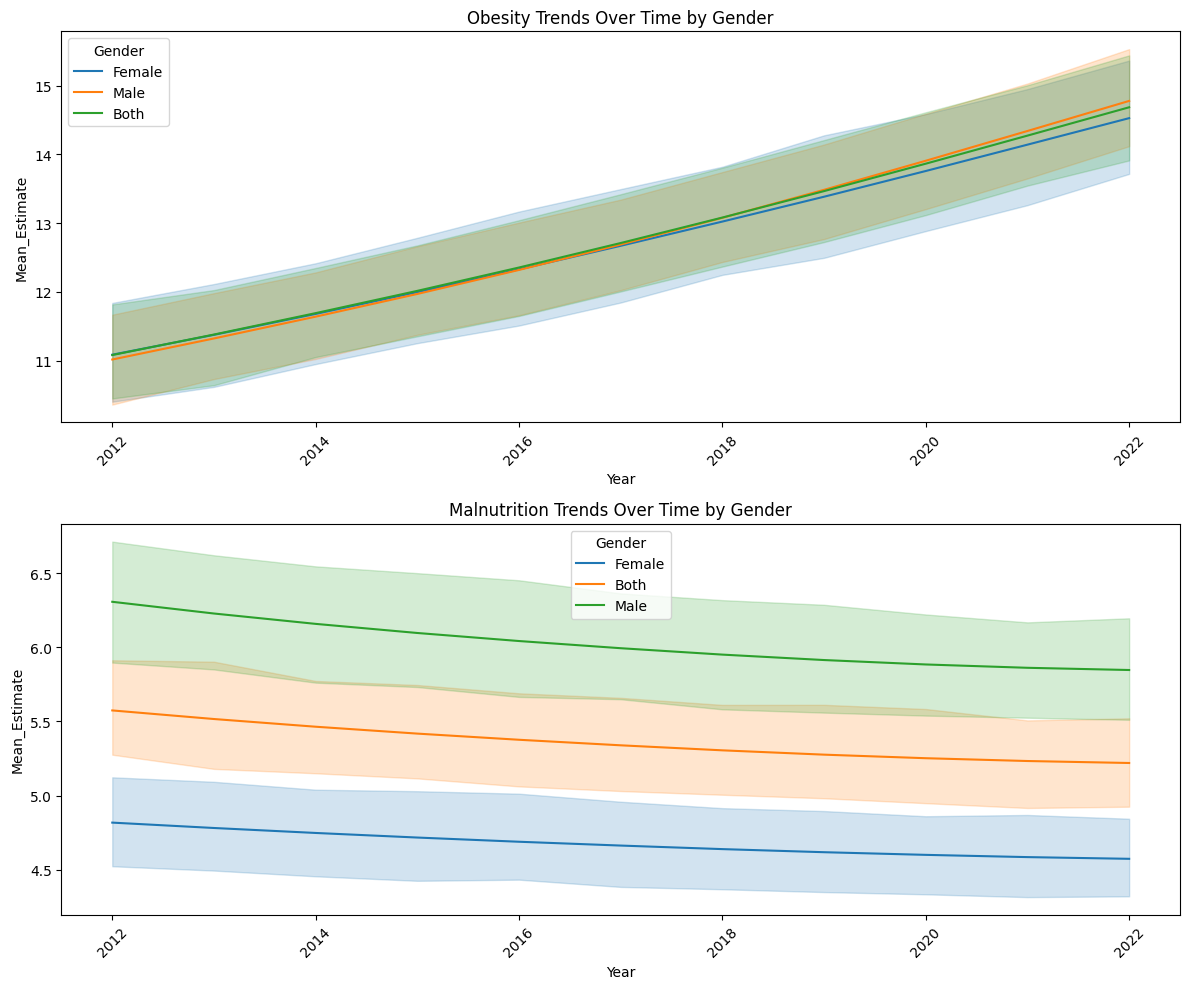

In [70]:
plt.figure(figsize=(12, 10))

plt.subplot(2,1,1)
sns.lineplot(df_obesity, x='Year', y='Mean_Estimate',hue='Gender')
plt.title("Obesity Trends Over Time by Gender")
plt.xticks(rotation=45)

plt.subplot(2,1,2)
sns.lineplot(df_malnutrition, x='Year', y='Mean_Estimate',hue='Gender')
plt.title("Malnutrition Trends Over Time by Gender")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()




##### 5. Heatmap Year vs country

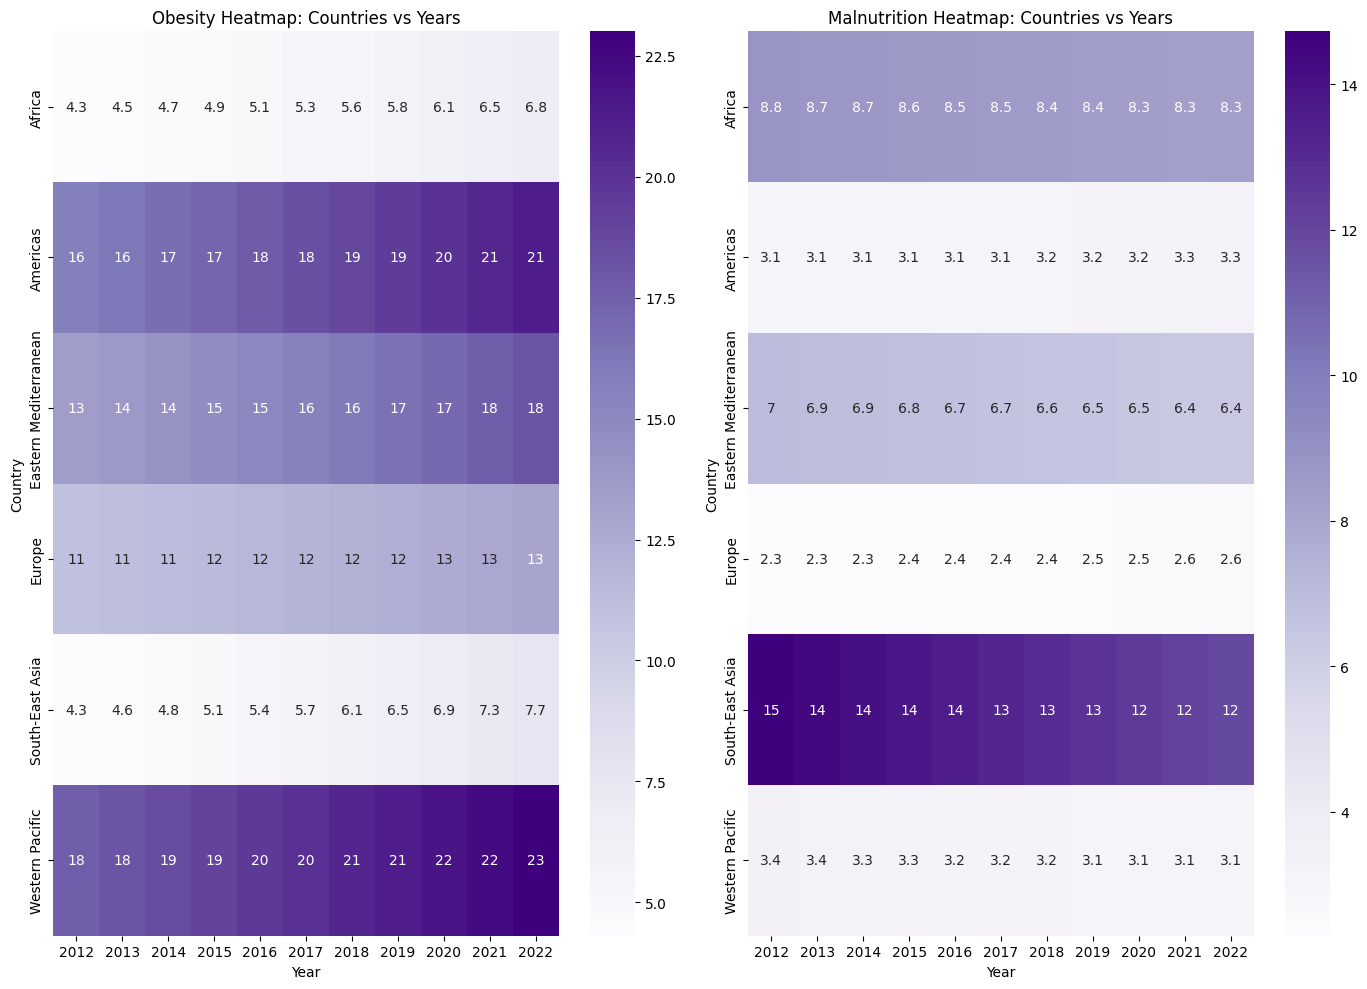

In [71]:
# Pivot for heatmap (Obesity)
obesity_pivot = df_obesity.pivot_table(index='Region', columns='Year', values='Mean_Estimate')
mal_pivot = df_malnutrition.pivot_table(index='Region', columns='Year', values='Mean_Estimate')


plt.figure(figsize=(14, 10))

plt.subplot(1,2,1)
sns.heatmap(obesity_pivot,annot=True,cmap="Purples")
plt.title("Obesity Heatmap: Countries vs Years")
plt.xlabel("Year")
plt.ylabel("Country")

plt.subplot(1,2,2)
sns.heatmap(mal_pivot,annot=True,cmap='Purples')
plt.title("Malnutrition Heatmap: Countries vs Years")
plt.xlabel("Year")
plt.ylabel("Country")

plt.tight_layout()
plt.show()


In [72]:
mal_pivot

Year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Region,,,,,,,,,,,
Africa,8.849655,8.749857,8.662762,8.587719,8.523125,8.466465,8.414722,8.369700,8.331320,8.298626,8.270096
Americas,3.121410,3.116026,3.116324,3.121800,3.132567,3.148188,3.169402,3.196126,3.227986,3.265125,3.307314
Eastern Mediterranean,6.991810,6.922765,6.854234,6.786150,6.719267,6.653714,6.587674,6.524803,6.464415,6.408595,6.361410
Europe,2.296046,2.310985,2.330365,2.353582,2.380092,2.409274,2.441439,2.477604,2.518300,2.563212,2.613453
South-East Asia,14.724789,14.416302,14.115439,13.822199,13.533880,13.251247,12.974610,12.703767,12.440858,12.187492,11.944679
Western Pacific,3.408141,3.362324,3.319999,3.280521,3.243076,3.207581,3.174106,3.144027,3.117266,3.093618,3.074321


##### 6. TOP 10 countries with Obesity & Malnutrition

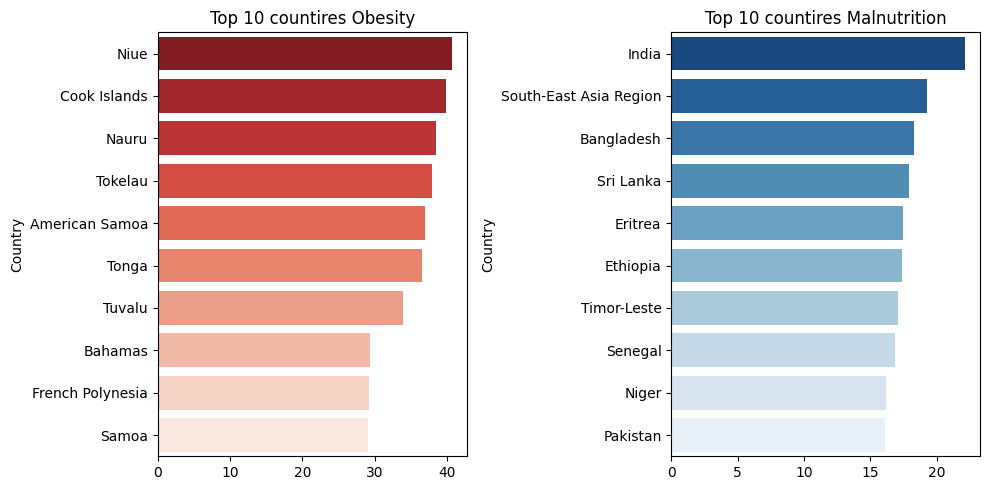

In [73]:
top_obi=df_obesity.groupby('Country')['Mean_Estimate'].mean().sort_values(ascending=False).head(10)
top_mal=df_malnutrition.groupby('Country')['Mean_Estimate'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.barplot(x=top_obi.values,y=top_obi.index,hue=top_obi.index,palette='Reds_r',legend=False)
plt.title("Top 10 countires Obesity")

plt.subplot(1,2,2)
sns.barplot(x=top_mal.values,y=top_mal.index,hue=top_mal.index,palette='Blues_r',legend=False)
plt.title("Top 10 countires Malnutrition")

plt.tight_layout()
plt.show()

##### 7. Highlight where obesity and malnutrition are both high 

In [74]:
obesity_avg=df_obesity.groupby('Country')['Mean_Estimate'].mean().rename("Obesity")
malnutrition_avg=df_malnutrition.groupby('Country')['Mean_Estimate'].mean().rename("Malnutrition")

double_burden=pd.concat([obesity_avg,malnutrition_avg],axis=1)

obesity_threshold=double_burden['Obesity'].quantile(0.75)
malnutrition_threshold=double_burden['Malnutrition'].quantile(0.75)

double_berden_countries=double_burden[
    (double_burden['Obesity']>=obesity_threshold)&
    (double_burden['Malnutrition']>=malnutrition_threshold)
]



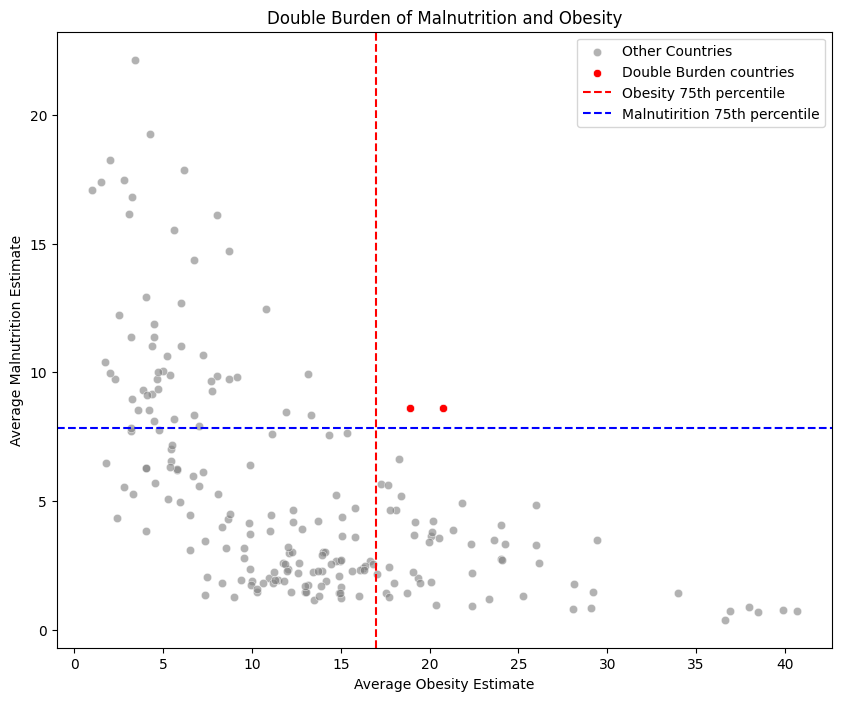

In [75]:
plt.figure(figsize=(10,8))

sns.scatterplot(double_burden,x='Obesity',y='Malnutrition',color='grey',alpha=0.6,label='Other Countries')

sns.scatterplot(double_berden_countries,x='Obesity',y='Malnutrition',color='red',label='Double Burden countries')

plt.axvline(obesity_threshold,color='red',linestyle="--",label='Obesity 75th percentile')
plt.axhline(malnutrition_threshold,color='blue',linestyle="--",label='Malnutirition 75th percentile')

plt.title("Double Burden of Malnutrition and Obesity")
plt.xlabel("Average Obesity Estimate")
plt.ylabel("Average Malnutrition Estimate")
plt.legend()
plt.show()

## Step - 4 Create a Database using the tables

In [76]:
import sqlite3

In [77]:
#Creating cusor
conn=sqlite3.connect("nutrition_paradox.db")
cursor=conn.cursor()

In [78]:
df_obesity.to_sql("obesity", conn, if_exists="replace", index=False)
df_malnutrition.to_sql("malnutrition", conn, if_exists="replace", index=False)

conn.commit()
conn.close()